In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/hhs/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
xperiod=2
V0=0.

In [11]:
def Ham(k,V0,xperiod):
    Hm=np.zeros([xperiod,xperiod],dtype=complex)

    for n in range(xperiod-1):
        Hm[n,n+1]=-1
        Hm[n+1,n]=-1

    for n in range(xperiod//2):
        Hm[n,n]=2-V0
        Hm[n+xperiod//2,n+xperiod//2]=2+V0

    Hm[0,-1]+=-np.exp(-1j*k*xperiod)
    Hm[-1,0]+=-np.exp(+1j*k*xperiod)
    return Hm

In [12]:
kmin = -np.pi/(xperiod)
kmax = -kmin

CPU times: user 39.5 ms, sys: 19.8 ms, total: 59.2 ms
Wall time: 56.7 ms


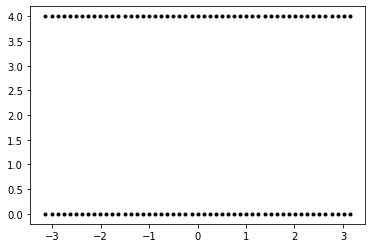

In [14]:
%%time
Nkx=51
kkx = np.linspace(kmin,kmax,Nkx)
EE=[]

for kx in kkx:
    Hm = Ham(kx,V0,xperiod)
    EE, UU = np.linalg.eigh(Hm)
    #plt.plot(EE)
    plt.plot([kx*xperiod]*len(EE),EE,'k.')

Wall time: 19.5 ms


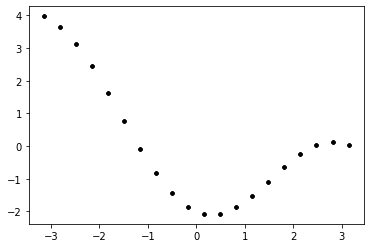

In [73]:
%%time
Nkx=20
Nky=20
kx = np.linspace(kmin,kmax,Nkx)
ky = np.linspace(kmin,kmax,Nky)


Wy = 5
ny=np.arange(1,Wy+1)
Eny=np.zeros([Wy, Nky])
EE=np.zeros([Wy, Nky])
#Kny=ky-2*np.pi*ny/Wy
#Eny=np.pi**2*(2*ny+Kny*Wy/np.pi)*(xperiod/Wy)**2
#kny = np.arange(1, Wy+1)*np.pi/(Wy+1)
#kky=-np.pi+2*np.pi/Wy*np.arange(1,Wy+1,1)


for j in range(Wy):
    for i in range(Nkx):
        Hm = Ham(kx[i],V0,xperiod)
        EE[j,i], UU = np.linalg.eigh(Hm)
        #print(EE[j])
        Ky=ky[i]-2*np.pi*ny[j]/Wy
        #print(Ky)
        Eny[j,i]=(np.pi**2*(2*ny[j]+Ky*Wy/np.pi)*(xperiod/Wy)**2)


for j in range(Wy):
    plt.plot(kx, EE[j,:]-Eny[j,:], 'k.')

#plt.plot([k*xperiod]*len(EE),EE/EE,'b.')
#plt.ylim(0,6)
#plt.xlim(-np.pi,np.pi)

In [10]:
M=np.array([[2,-1,0],[-1,2,0],[0,-1,2]])
ee, uu = np.linalg.eigh(M)

In [11]:
ee

array([0.58578644, 2.        , 3.41421356])